# CUDSTOMER CHURN PREDICTION 

# Business Problem
 Business problem is very simple, There is a Bank who wants to
retain their existing customers who may churn, for that they have to
know which existing customers has the highest probability of
leaving the company and which customers have lowest probability
of leaving the company.



Churning of customers is a big problem for banks, they want to
maximise the retention of the customers so that they can plan their
future projects.


Also if a Bank wants to get a funding from big investors, Rate of
churning plays an important role.


<b> So Bank wants to build a Machine Learning model which can
predict whether a particular customer will churn or not.</b>

# Data
We have 10000 rows with 13 features and 1 target variable, Every row tells us different customer details and whether they churned or not after the observation.

# Machine learning  Formulation

So Converting a Business problem to a Machine Learning problem,
This seems to be a simple binary classification problem in which we have 2 classes, "yes" and "no".

We have some numerical features, some categorical features.

# Algoritham

1. KNN


2. Logestic Regression


3. SVM


4. Decision Tree


5. Random Forest

# Performance Matric

In [1]:
#importing the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file (We will now read the data from a CSV file into a Pandas DataFrame.)

df=pd.read_csv("Churn_Modelling.csv")

In [6]:
#print top 5 values

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [148]:
#print bottom 5 values
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# observation 
* Checking if any data point is null or not.


* Their is no any null values in dataset. 

In [150]:
#Getting the shape of the data.
df.shape

(10000, 14)

# Observation

* There are 10000 rows and 14 columns in our data.


In [151]:
#checking the duplicates values
duplicate = df[df.duplicated()]
duplicate.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Observation
* Their are no duplicate values in our dataset.

In [152]:
# checking the missing values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Observation
* There are no missing value on our dataset.


* We will now proceed to analyze this dataset, observe patterns, and identify outliers with the help of graphs and figures.

In [153]:
#checking the duplicates values.

duplicate = df[df.duplicated()]
duplicate.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Observation
* There are no any duplication values in our dataset.


In [154]:
# Checking count of customers who left and stayed

df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Observation 
* 1 = Customer Who Exited.
* There are <b>2037</b> people are exited.


* 0 = Customer Who Stayed.
* There are<b> 7963 </b>people are stayed.

In [155]:
#sns.countplot(data= df_categorical, x= 'Hascrcard',hue='Exited')   .... for countplot

df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Observation

* Here we got all 14 column names, out of this 1 will be our class lable (Exited) & rest 13 ('RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary) will be our features.



* Now we will be dividing these features into Numerical & Categorical. 


* RowNumber, CustomerID & Surname will has no use for analysing this data.

In [156]:
# Dividing features into numerical and categorical features.

df_numerical = df[['CreditScore','Age','Balance','EstimatedSalary','Exited']]

df_categorical = df[['Geography', 'Gender', 'Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']]

In [157]:
#Show numerical feature

df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


# Observation


* In numerical there are 4 features ('CreditScore','Age','Balance','EstimatedSalary') and 1 class lable(Exited).


* There are 10000 rows of data available in our data set. 

In [158]:
#Show categorical feature

df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


# Observation
* In categorical there are 6 features ('Geography', 'Gender', 'Tenure','NumOfProducts','HasCrCard','IsActiveMember') and 1 class lable (Exited).


* There are 10000 rows of data available in our dataset.

# EDA ( Exploratory data Analysis )
Two types of analysis:

1. Univariate  - (Histogram, Pdf, Cdf, Box plot, Violin plot)


2. Bivariate  - (Scatter plot, Pair plot)

# EDA for Numerical Features

In [159]:
df_numerical.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited'], dtype='object')

# Univariate Analysis

## 1. CreditScore

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

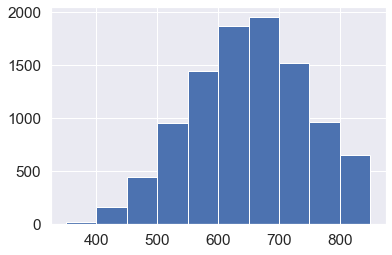

In [160]:
# Histogram of creditscore

plt.hist(df_numerical['CreditScore'])

# Observation

* Credit score histogram is only giving us a hint to normal distributed curve, It means most of the people have credit score in betweeen 600 to 700.


* CreditScore histogram is giving us hint of <b>Left skewed distrubation curve</b>


* It does not clearly classification show the actual people stayed/left and has credit score value.


* There are less people which have credit score more than 850 and which have credit score less than 550.

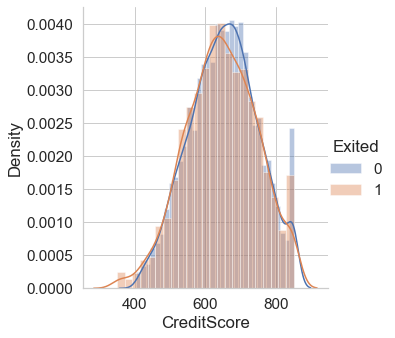

In [161]:
# pdf of creditscore

sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "CreditScore")\
   .add_legend();
plt.show();


# Observation

* pdf is of stayed customers and left customers are overlapping on each other.


* It is not helpful to differentiate between customers who stayed and left.

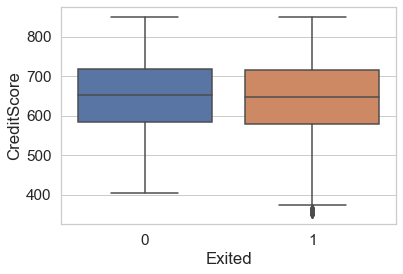

In [162]:



#box plot

sns.boxplot(x='Exited',y='CreditScore', data=df_numerical)
plt.show()

# Observation 

In that Box plot there is not much difference people who stayed and left, but we can say that :
### For stayed customers
* 25% of stayed customers have Credit score less than 580
* 50% of stayed customers have Credit Score less than 670
* 75% of stayed customers have Credit Score less than 720
### For left customers

* 25% of left customers have Credit score less than 570
* 50% of left customers have Credit Score less than 660
* 75% of left customers have Credit Score less than 710


As per whisker showing in the plot people who left have minimum CreditScore

<function matplotlib.pyplot.show(close=None, block=None)>

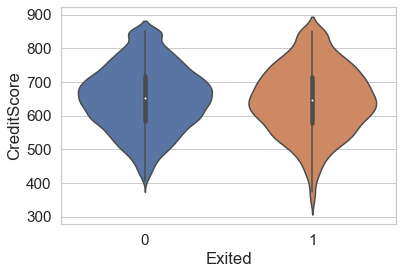

In [163]:
#violin plot

sns.violinplot(x='Exited',y='CreditScore',data=df_numerical)
plt.show

# Observation

* Violin Plot is showing us the pdf and box plot data in one frame.


* This violin plot is not helping in analysing data.

# Age

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

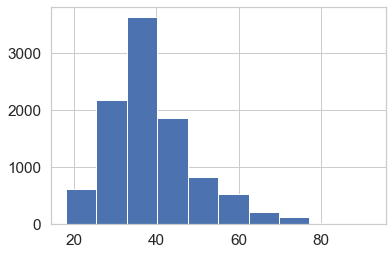

In [164]:
# Histogram of Age

plt.hist(df_numerical['Age'])

# Observation 

* Age histogram is giving us hint of <b>Right skewed distrubation curve</b>.


* Histogram shows most of the customers have Age between 30-40 and very less customers above age of 50 above.


* Age between 30-40 there are 3500 customers are seen  and the age above 80 we say that negligibal amount of customers are their.

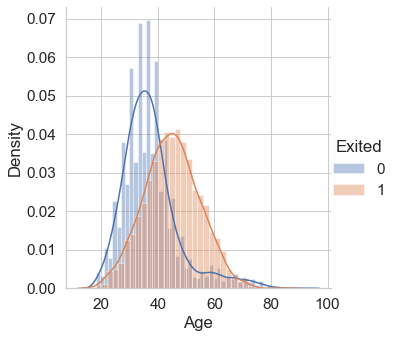

In [165]:
#distplot of Age

sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "Age")\
   .add_legend();
plt.show();

# Observation 

* Age feature has pdf shows that most customers between <b>age group of 30 to 40 are stayed<b/>.


* Age Between 40 to 60 have high chances of customers to left.


* Below the age of 18 we say that customers can not join to bank.

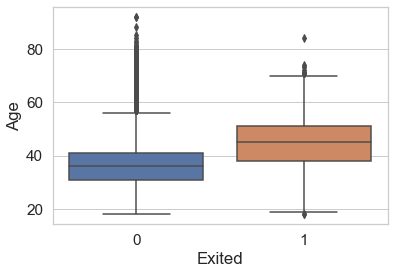

In [166]:
#box plot

sns.boxplot(x='Exited',y='Age', data=df_numerical)
plt.show()

# Observation

* In Boxplot of Age feature IQR of Customers who stayed in between 32 to 42.


* <b>IQR</b> of Customers who left is in between 38 to 52, that can indicates that overplapping around age in between 37 to 42.


* Boxplot of Age feature that shortly helping in analysing data. 


* As per whisker showing in the plot people who left have more than 52 Age.


<function matplotlib.pyplot.show(close=None, block=None)>

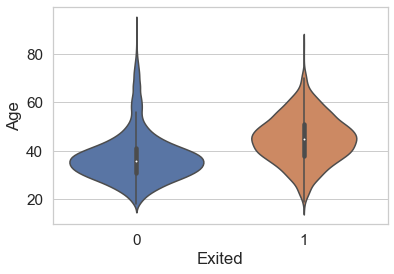

In [167]:
#violin plot

sns.violinplot(x='Exited',y='Age',data=df_numerical)
plt.show

# Observation


* Violin Plot shows us the box plot and the pdf in one frame.


* Also we sat that 50% of stayed customers have Age less than 35 and 50% of left customers have Age less than 45.


* This violin plot is not helping in any more information to analysing data.

# 3. Balance

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

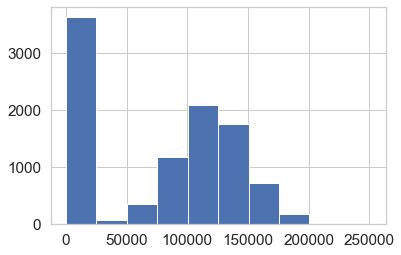

In [168]:
# Histogram

plt.hist(df_numerical['Balance'])

# Observation 

* In that Histogram we see above 3500 peoples have balance nearly zero in bank.


* The peple in between 2200 to 1800 has bance is in between 100000 to 150000.   


* Also wee see less people have balance above 150000.

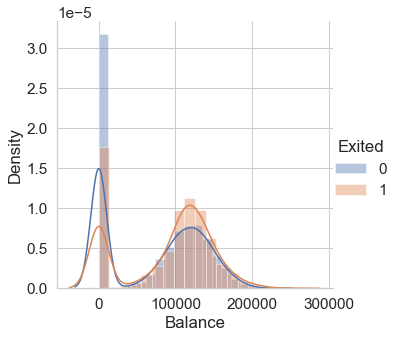

In [169]:
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "Balance")\
   .add_legend();
plt.show();

# Observation 
* Most of the customers have balance zero in their bank account. 


* Although they have zero balance but majority of them have stayed with the bank.

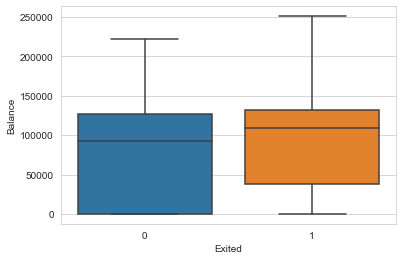

In [26]:
#box plot

sns.boxplot(x='Exited',y='Balance', data=df_numerical)
plt.show()

# Observation 
* In Boxplot of Balance feature shows IQR of Customers who stayed in between 0 to 130000 and IQR of Customers who left is in between 40000 to 140000.

### For stayed customers
* 25% of stayed customers have Balance equal to 0.
* 50% of stayed customers have Balance less than 9000.
* 75% of stayed customers have Balance less than 13000.

### For left customers
* 25% of left customers have Balance less than 40000.
* 50% of left customers have Balance less than 11000.
* 75% of left customers have Balance less than 13500.


# Percentile

In [27]:
#Persentile of Balance feature

print(np.percentile(df_numerical['Balance'],36))
                           
print(np.percentile(df_numerical['Balance'],37))

0.0
51854.097800000025


# Observation 
* After checking with percentiles we say that 36% out of total customers have Balance is 0.0


* After say that 37% out of total customers have Balance is 51854.097

# 4. Estimated salary

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

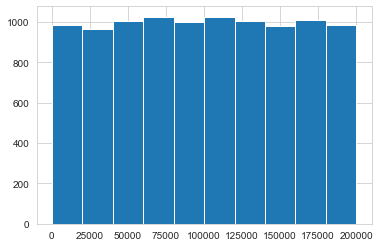

In [28]:
# Histogram

plt.hist(df_numerical['EstimatedSalary'])

# Observation 
* In that plot there is not much difference between number of customers on different salary range.


* Histogram of EstimatedSalary shows that the universal distribution.


* This plot is not much helping us to get to analyse the data.

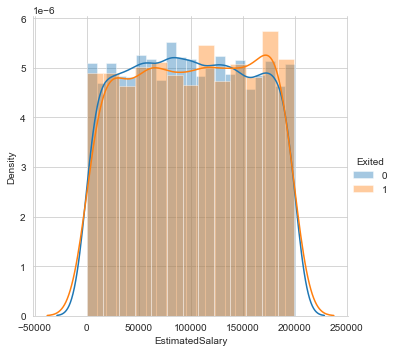

In [29]:
#PDF of EstimatedSalary
 
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(sns.distplot, "EstimatedSalary")\
   .add_legend();
plt.show();

# Observation 
* PDF of EstimatedSalary is not much useful plot to analyse the data.


* Pdf of EstimatedSalary there are stayed customers and left customers have plot is overlapping on each other hence It is not helpful to differentiate between customers who stayed and left.

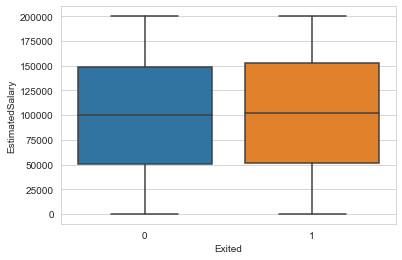

In [30]:
#box plot

sns.boxplot(x='Exited',y='EstimatedSalary', data=df_numerical)
plt.show()

# Observation

* Here box plot is not helping in analysing data because of their is no much difference in both the box plot.



# Bi-Variate Analysis 

* We will begin with Pair Plot to observe what is happening inside our numerical features.

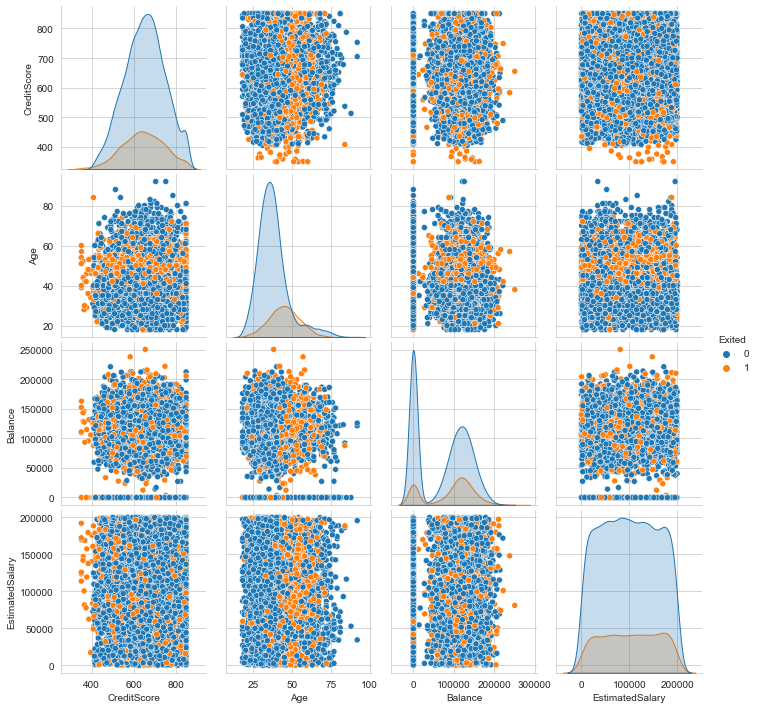

In [31]:
sns.pairplot(df_numerical,hue='Exited')

# Observation
1. We can see some pattern forming between <b>Age & CreditScore<b/>.


2. We can see some pattern forming between <b>EstimatedSalary & Age<b/>.

# Scatter Plot

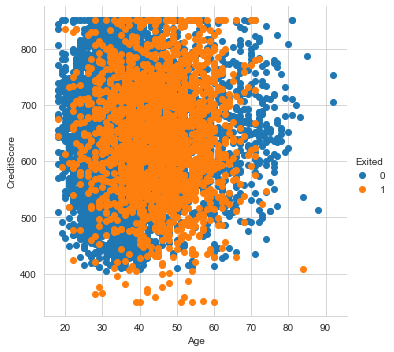

In [32]:
# LETS PLOT CREDIT SCORE AND AGE

import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(plt.scatter, "Age","CreditScore")\
   .add_legend();
plt.show();

# Observation
* we can say that majority of the customers who have left the bank at circular region in approximately centre of the plot.



* The region between age of 30 to 70 and the region between credit score of 500 to 800 there are most chance to customers have left.

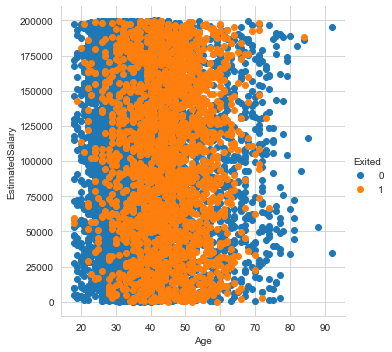

In [33]:
# scatter plot bvetween Age and EstimatedSalary

import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5) \
   .map(plt.scatter, "Age","EstimatedSalary")\
   .add_legend();
plt.show();

# Observation 

* we can see the vertical linear formation of pattern in age between 30 to 60 which are left.


* Below age of 30 and above age of 60 customers are more likely to stay.


* In between 40 to 50 most of the chance to left.


# Scaling of Numerical features

* Here, we will do scalling of the numerical features to narmalise the features.

In [34]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [35]:
# MeanMax scaling

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
CS= scaling.fit_transform(df_numerical[['CreditScore']])
age = scaling.fit_transform(df_numerical[['Age']])
Balance= scaling.fit_transform(df_numerical[['Balance']])

ES=scaling.fit_transform(df_numerical[['EstimatedSalary']])

df_numerical['CreditScore'] = CS

df_numerical['Age'] = age

df_numerical['Balance'] = Balance

df_numerical['EstimatedSalary'] = ES


In [36]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


# Observation:
* we have normalised all the feature values and they all are now in same scale between 0 to 1.


* we have used Minmax scalar here to narmalise the values.

# Categorical features

In [37]:
# columns names of categorical features

df_categorical.columns

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [38]:
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


# Observation

* In categorical there are 6 features ('Geography', 'Gender', 'Tenure','NumOfProducts','HasCrCard','IsActiveMember') and 1 class lable (Exited).


* There are 10000 rows of data available in our dataset.

# One Hot Encoding

In [39]:
# converting categorical data into numerical data

categorical = ['Geography','Gender']
df_categorical = pd.get_dummies(df_categorical, columns=categorical, drop_first=False)
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,1,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,0,1,1,0
2,8,3,1,0,1,1,0,0,1,0
3,1,2,0,0,0,1,0,0,1,0
4,2,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,1,0,0,0,1
9996,10,1,1,1,0,1,0,0,0,1
9997,7,1,0,1,1,1,0,0,1,0
9998,3,2,1,0,1,0,1,0,0,1


In [170]:
categorical = ['Geography','Gender']
df_categorical = pd.get_dummies(df_categorical, columns=categorical, drop_first=True)
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,2,1,1,1,1,0,0,0
1,1,1,0,1,0,0,1,0
2,8,3,1,0,1,0,0,0
3,1,2,0,0,0,0,0,0
4,2,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,0,0,1
9996,10,1,1,1,0,0,0,1
9997,7,1,0,1,1,0,0,0
9998,3,2,1,0,1,1,0,1


# Observation
* Here we are converting the categorical data into numerical data to help understand the data properly to the machine using one hot encoding process.


* By one hot encoding our number of features have increased and that will make our data of too many dimensions.


* To minimise the number of columns(features) we Adjusted the data in a way that, where Male and female were 2 columns we diducted into 1 (Gender_male).


* which tales us that the customer is male or not that will ultimately tell you that if customer is not male then she's female.

# Tenure

In [41]:
import warnings
warnings.filterwarnings("ignore")
b=df_categorical['Tenure'].value_counts()
b

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

# Observation
* we can see that there are 11 different tenures in our data from 0 to 10 years.


* Tenure 2 has highest count which is 1048.

<AxesSubplot:>

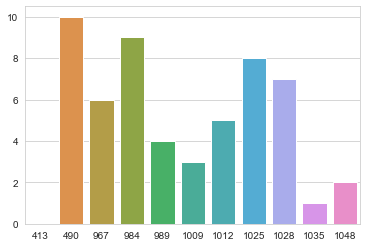

In [42]:
# Bar Plot

sns.barplot(x=b.values,y=b.index)

# Observation
* From the above graph it shows that the most of the customers (1048) have tenure 2 years and also it shows that the 1035 customers have tenure 1 years.


* Very less customers (490) have tenure is 10 years and 984 customers have tenure is 9 years.

(-1.1058178224184918,
 1.1002770391627854,
 -1.1056794625804278,
 1.1052094675315791)

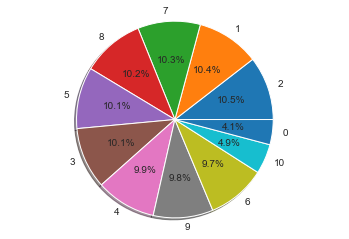

In [43]:
labels = b.index
sizes =b.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

# Observation
 
* This pie chart shows only 4.1% of customers have tenure of 0 years and 10.4% of customers have tenure of 1 year.


* Only 4.9% of the customers are having tenure of 10 years that is the highest years in tenure.


* Also 10.5% is the highest percentage of customers have tenure of 2 years.

# Number of Products


In [44]:
import warnings
warnings.filterwarnings("ignore")
a=df_categorical['NumOfProducts'].value_counts()
a

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

# Observation
* Here we see that customer id is 4 has number of products is 60.


* customer id is 1 has number of products is 5084 it shows that Number of customers id decreasing as the number of products is increasing.

<AxesSubplot:>

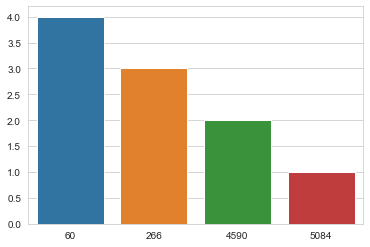

In [45]:
sns.barplot(x=a.values,y=a.index)

# Observation 
* There are highest ratio of 5084 people have brought one product.


* 60 people have brought 4 product. 


* 266 people have brought 3 products.


* 4590 people have brought 2 products.


* Also we say that brought products is inversly praportional to customers(people).

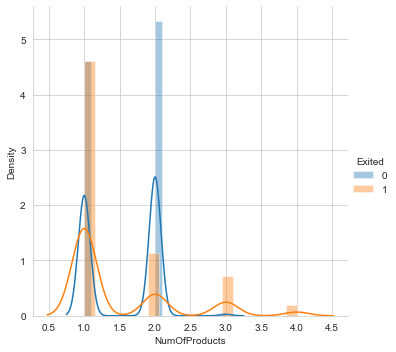

In [46]:
import warnings
warnings.filterwarnings("ignore")

#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "NumOfProducts")\
   .add_legend();
plt.show();

# Observation 
* Nearly equal people have brought one product which is stayed as well as left and also maximum number of customers who have bought 2 products have stayed with the bank.


* Maximum probability of people have left which has brought four products. 


* Also we say that after buy 2 products peole have less chance to stay.

# Has Credit Card


In [47]:
warnings.filterwarnings("ignore")
b=df_categorical['HasCrCard'].value_counts()
b

1    7055
0    2945
Name: HasCrCard, dtype: int64

# Observation
Here we are count the values that customer who has credit card and customer who does not have credit card.
* 1 = No Creadit Card.

>7055 customers who does not have credit card.


* 0 = Have creadit card.

>2945 customers who have credit card.

<AxesSubplot:>

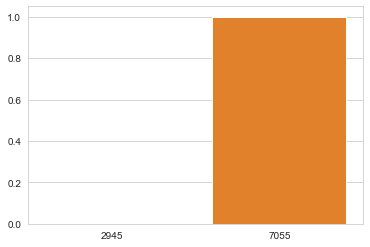

In [48]:
#Bar plot

sns.barplot(x=b.values,y=b.index)

# Observation
* This graph is showing us that 2945 customers do have credit card.


* And 7055 customers does not have credit card. .

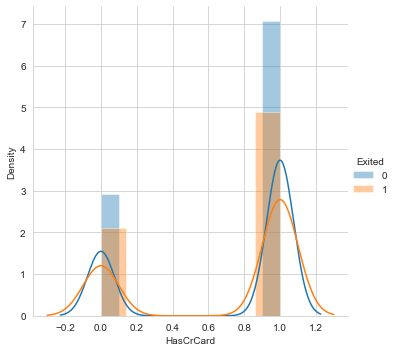

In [49]:
#distplot

sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5) \
   .map(sns.distplot, "HasCrCard")\
   .add_legend();
plt.show();


# Observation 
* This PDF is not giving us much information to analyse data.

(-1.1179836976946826,
 1.1008563665568896,
 -1.1127024981118583,
 1.1140147351863388)

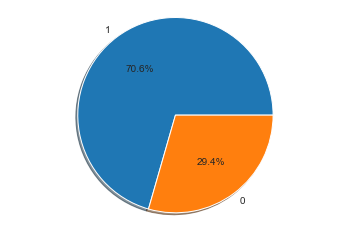

In [50]:
# piechart

labels = b.index
sizes =b.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

# Observation 
* This pie chart indicates that 70.6% of the customers does not have credit card.


* Also Pie chart shows that the 29.4% customers have credit card.

# Mean , Median and Percentile

In [51]:
stayed = df[df['Exited']==0]

left = df[df['Exited']==1]

In [52]:
left

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [53]:
stayed

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


# Observation


* In one hot encoding we are converting the categorical data into numeric data to help understand the data properly to the machine.

# Credit Score

In [54]:
# Mean
print ("Mean :")
print((np.mean(stayed['CreditScore'])),"for customers who stayed")
print((np.mean(left['CreditScore'])),"for customers who left")

Mean :
651.8531960316463 for customers who stayed
645.3514972999509 for customers who left


In [55]:
# Meadian
print ("Median :")
print((np.median(stayed['CreditScore'])),"for customers who stayed")
print((np.median(left['CreditScore'])),"for customers who left")

Median :
653.0 for customers who stayed
646.0 for customers who left


In [56]:
# Standard Deviation 
print ("Standard Deviation :")
print((np.std(stayed['CreditScore'])),"for customers who stayed")
print((np.std(left['CreditScore'])),"for customers who left")

Standard Deviation :
95.64783071535247 for customers who stayed
100.29687481012597 for customers who left


# Age

In [57]:
# Mean
print ("Mean :")
print((np.mean(stayed['Age'])),"for customers who stayed")
print((np.mean(left['Age'])),"for customers who left")

Mean :
37.40838879819164 for customers who stayed
44.8379970544919 for customers who left


In [58]:
# Meadian
print ("Median :")
print((np.median(stayed['Age'])),"for customers who stayed")
print((np.median(left['Age'])),"for customers who left")

Median :
36.0 for customers who stayed
45.0 for customers who left


In [59]:
# Standard Deviation 
print ("Standard Deviation :")
print((np.std(stayed['Age'])),"for customers who stayed")
print((np.std(left['Age'])),"for customers who left")

Standard Deviation :
10.124727115441777 for customers who stayed
9.759165198147958 for customers who left


# Balance

In [60]:
# Mean
print ("Mean :")
print((np.mean(stayed['Balance'])),"for customers who stayed")
print((np.mean(left['Balance'])),"for customers who left")

Mean :
72745.29677885193 for customers who stayed
91108.53933726063 for customers who left


In [61]:
# Meadian
print ("Median :")
print((np.median(stayed['Balance'])),"for customers who stayed")
print((np.median(left['Balance'])),"for customers who left")

Median :
92072.68 for customers who stayed
109349.29 for customers who left


In [62]:
# Standard Deviation 
print ("Standard Deviation :")
print((np.std(stayed['Balance'])),"for customers who stayed")
print((np.std(left['Balance'])),"for customers who left")

Standard Deviation :
62844.094322747915 for customers who stayed
58346.467874478956 for customers who left


# Estimated Salary 

In [63]:
# Mean
print ("Mean :")
print((np.mean(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.mean(left['EstimatedSalary'])),"for customers who left")

Mean :
99738.39177194514 for customers who stayed
101465.6775306824 for customers who left


In [64]:
# Meadian
print ("Median :")
print((np.median(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.median(left['EstimatedSalary'])),"for customers who left")

Median :
99645.04 for customers who stayed
102460.84 for customers who left


In [65]:
# Standard Deviation 
print ("Standard Deviation :")
print((np.std(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.std(left['EstimatedSalary'])),"for customers who left")

Standard Deviation :
57401.982332801934 for customers who stayed
57898.201201044954 for customers who left


# step to do 
1. Joining my numerical and categorical feature
2. Train, Cv ,Test
3. Individual algoritham
4. Testing of performance
5. conclusion


# Join of numerical and categorical feature


In [66]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


In [67]:
# removing the exited column to get rid of duplicate columns

df_categorical
df_categorical2=df_categorical.drop("Exited",axis=1)

In [68]:
#concatinating 2 dataframes

df_concat2 = pd.concat([df_categorical2,df_numerical], axis=1)

df_concat2

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary,Exited
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735,1
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709,0
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654,1
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120,0
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341,0
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490,0
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390,1
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429,1


In [69]:
#sepearting features from classlabels

X=df_concat2.iloc[:,0:13]

In [70]:
X

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429


In [71]:
Y=df_concat2.iloc[:,13:]

In [72]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [73]:
#train test split
#spliting the data into train and test

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [74]:
X_train.shape

(8000, 13)

In [75]:
y_train.shape

(8000, 1)

In [76]:
X_test.shape

(2000, 13)

In [77]:
y_test.shape

(2000, 1)

# Modelling 

# KNN(K NEAREST NEIGHBOUR)

We will apply knn to our data and then check its performance

In [78]:
#applying knn

# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN classifier

hyper_parameter_k=[{'n_neighbors':[3,5,7,9]}]
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,hyper_parameter_k,scoring='accuracy')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print("Training accuracy is",modelknn.score(X_train,y_train))
print("Testing accuracy is ",modelknn.score(X_test,y_test))
# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=7)
Training accuracy is 0.847625
Testing accuracy is  0.8165


In [79]:
#PREDICTIONS
knn_test_prediction=modelknn.predict(X_test)#this is your y_pred_test
knn_train_predictions=modelknn.predict(X_train)#y_pred_train

In [80]:
#Evaluation
from sklearn.metrics import f1_score
X_knntest_F1score=f1_score(y_test,knn_test_prediction)
print("Testing f1 score is",X_knntest_F1score) #f1 score on test data

X_knntrain_F1score=f1_score(y_train,knn_train_predictions)
print("Training f1 score is",X_knntrain_F1score) #f1 score on train data

Testing f1 score is 0.34111310592459604
Training f1 score is 0.5098512263771612


In [81]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf=confusion_matrix(y_test,knn_test_prediction)
print(x_knn_cf)

[[1538   69]
 [ 298   95]]


Test confusion matrix


<AxesSubplot:>

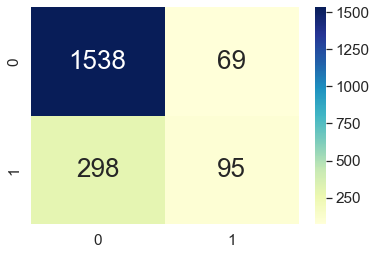

In [82]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [83]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf_train=confusion_matrix(y_train,knn_train_predictions)
print(x_knn_cf)

[[1538   69]
 [ 298   95]]


Train confusion matrix


<AxesSubplot:>

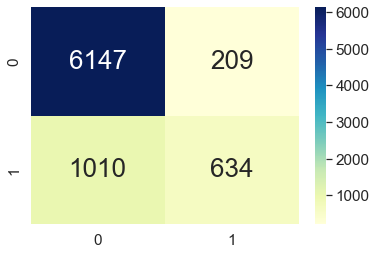

In [84]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [85]:
#Precison
#training data
from sklearn.metrics import precision_score
x_knn_p=precision_score(y_train,knn_train_predictions)
print("The precision of x_knn_p for training data",x_knn_p)

The precision of x_knn_p for training data 0.7520759193357058


In [86]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_knn_p_test=precision_score(y_test,knn_test_prediction)
print("The precision of x_knn_p for testing data",x_knn_p_test)

The precision of x_knn_p for testing data 0.5792682926829268


In [87]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_knn_r_train=recall_score(y_train,knn_train_predictions)
print("The recall of training data for knn is",x_knn_r_train)



The recall of training data for knn is 0.38564476885644766


In [88]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_knn_r_test=recall_score(y_test,knn_test_prediction)
print("The recall of test data for knn is",x_knn_r_test)



The recall of test data for knn is 0.24173027989821882


In [89]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,knn_train_predictions)

print("Training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,knn_test_prediction)

print("Testing accuracy is",b)



Training accuracy is 0.847625
Testing accuracy is 0.8165


# Logistic Regression

In [90]:
#we are using simple gridsearchcv to tune the hyperparameter C
#here we are not using smote samples

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]

LRmodel=GridSearchCV(LogisticRegression(max_iter=400,class_weight='balanced'),tuned_parameters)

LRmodel.fit(X_train,y_train)

print(LRmodel.best_estimator_)
print(LRmodel.score(X_test,y_test))
print(LRmodel.score(X_train,y_train))

#this is accuracy 

LogisticRegression(C=100, class_weight='balanced', max_iter=400)
0.7195
0.70775


In [91]:
#PREDICTIONS
LR_test_prediction=LRmodel.predict(X_test)#this is your y_pred_test
LR_train_predictions=LRmodel.predict(X_train)#y_pred_train

In [92]:
#evaluation
from sklearn.metrics import f1_score
x_LR_test_F1score=f1_score(y_test,LR_test_prediction)
print("Testing f1 score is",x_LR_test_F1score) #f1 score on test data

X_LR_train_F1score=f1_score(y_train,LR_train_predictions)
print("Training f1 score is",X_LR_train_F1score) #f1 score on train data

Testing f1 score is 0.49955396966993754
Training f1 score is 0.49240121580547114


In [93]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_LR_cf=confusion_matrix(y_test,LR_test_prediction)
print(x_LR_cf)

[[1159  448]
 [ 113  280]]


Test confusion matrix


<AxesSubplot:>

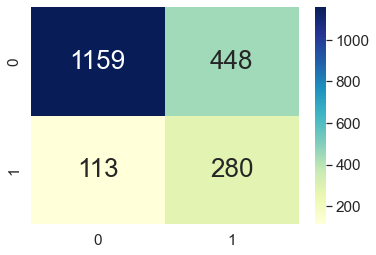

In [94]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_LR_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [95]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_LR_cf_train=confusion_matrix(y_train,LR_train_predictions)
print(x_LR_cf_train)

[[4528 1828]
 [ 510 1134]]


Test confusion matrix


<AxesSubplot:>

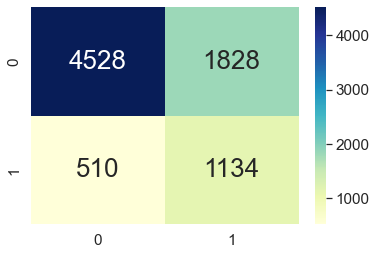

In [96]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_LR_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [97]:
#Precison
#training data
from sklearn.metrics import precision_score
x_LR_p=precision_score(y_train,LR_train_predictions)
print("The precision for training data",x_LR_p)

The precision for training data 0.3828494260634706


In [98]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_LR_p_test=precision_score(y_test,LR_test_prediction)
print("The precision for testing data",x_LR_p_test)

The precision for testing data 0.38461538461538464


In [99]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_LR_r_test=recall_score(y_test,LR_test_prediction)
print("The recall of test data for logestic regression is",x_LR_r_test)




The recall of test data for logestic regression is 0.712468193384224


In [100]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_LR_r_train=recall_score(y_train,LR_train_predictions)
print("The recall of training data for knn is",x_LR_r_train)


The recall of training data for knn is 0.6897810218978102


In [101]:
#accuracy
from sklearn.metrics import accuracy_score
c=accuracy_score(y_train,LR_train_predictions)

print("training accuracy is",c)

from sklearn.metrics import accuracy_score
d=accuracy_score(y_test,LR_test_prediction)

print("testing accuracy is",d)

training accuracy is 0.70775
testing accuracy is 0.7195


# SVM(SUPPORT VECTOR MACHINES)

In [102]:
#svm(support vector machine)
from sklearn import svm
tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]
clf= svm.SVC(kernel='rbf')
smodel=GridSearchCV(clf,tuned_parameters,cv=3)

smodel.fit(X_train,y_train)

print(smodel.best_estimator_)
print(smodel.score(X_test,y_test))
# Fit the classifier to the data

SVC(C=10)
0.83


In [103]:
#PREDICTIONS
SVM_test_prediction=smodel.predict(X_test)#this is your y_pred_test
SVM_train_predictions=smodel.predict(X_train)#y_pred_train

In [104]:
#evaluation
from sklearn.metrics import f1_score
X_SVM_test_F1score=f1_score(y_test,SVM_test_prediction)
print("Testing f1 score is",X_SVM_test_F1score) #f1 score on test data

X_SVM_train_F1score=f1_score(y_train,SVM_train_predictions)
print("Training f1 score is",X_SVM_train_F1score) #f1 score on train data

Testing f1 score is 0.28870292887029286
Training f1 score is 0.2978293791014639


In [105]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_SVM_cf=confusion_matrix(y_test,SVM_test_prediction)
print(x_SVM_cf)

[[1591   16]
 [ 324   69]]


Test confusion matrix


<AxesSubplot:>

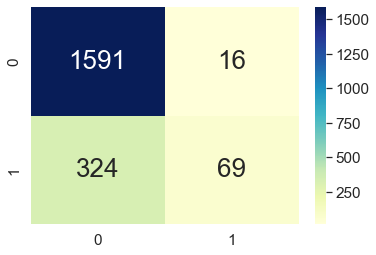

In [106]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_SVM_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [107]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_SVM_cf_train=confusion_matrix(y_train,SVM_train_predictions)
print(x_SVM_cf_train)

[[6314   42]
 [1349  295]]


Train confusion matrix


<AxesSubplot:>

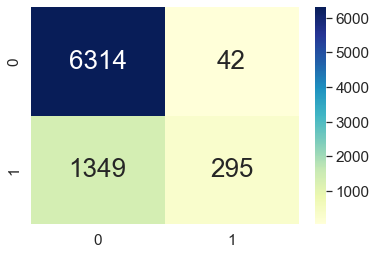

In [108]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_SVM_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [109]:
#Precison
#training data
from sklearn.metrics import precision_score
x_SVM_p=precision_score(y_train,SVM_train_predictions)
print("The precision  for training data",x_SVM_p)

The precision  for training data 0.8753709198813057


In [110]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_SVM_p_test=precision_score(y_test,SVM_test_prediction)
print("The precision of testing data",x_SVM_p_test)

The precision of testing data 0.8117647058823529


In [111]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_SVM_r_test=recall_score(y_test,SVM_test_prediction)
print("The recall of test data  is",x_SVM_r_test)



The recall of test data  is 0.17557251908396945


In [112]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_SVM_r_train=recall_score(y_train,SVM_train_predictions)
print("The recall of training data for knn is",x_SVM_r_train)


The recall of training data for knn is 0.1794403892944039


In [113]:
#accuracy
from sklearn.metrics import accuracy_score
e=accuracy_score(y_train,SVM_train_predictions)

print("training accuracy is",e)

from sklearn.metrics import accuracy_score
f=accuracy_score(y_test,SVM_test_prediction)

print("testing accuracy is",f)



training accuracy is 0.826125
testing accuracy is 0.83


# Decision Tree

In [114]:
from sklearn import tree
tuned_parameters=[{'max_depth':[4,5,6]}]

clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=42)


model=GridSearchCV(clf,tuned_parameters)

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=42)
0.8595
0.865875


In [115]:
#PREDICTIONS
DT_test_prediction=model.predict(X_test)#this is your y_pred_test
DT_train_predictions=model.predict(X_train)#y_pred_train

In [116]:
#evaluation
from sklearn.metrics import f1_score
X_DT_test_F1score=f1_score(y_test,DT_test_prediction)
print("Testing f1 score is",X_DT_test_F1score) #f1 score on test data

X_DT_train_F1score=f1_score(y_train,DT_train_predictions)
print("Training f1 score is",X_DT_train_F1score) #f1 score on train data

Testing f1 score is 0.5574803149606299
Training f1 score is 0.5927893738140418


In [117]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_DT_cf=confusion_matrix(y_test,DT_test_prediction)
print(x_DT_cf)

[[1542   65]
 [ 216  177]]


Test confusion matrix


<AxesSubplot:>

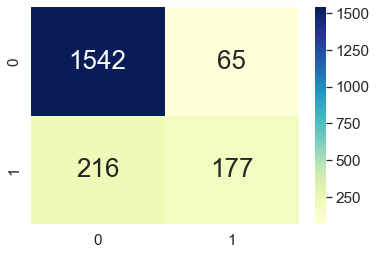

In [118]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_DT_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [119]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_DT_cf_train=confusion_matrix(y_train,DT_train_predictions)
print(x_DT_cf_train)

[[6146  210]
 [ 863  781]]


Train confusion matrix


<AxesSubplot:>

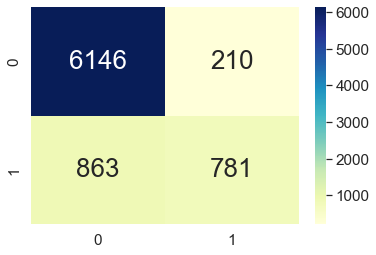

In [120]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_DT_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [121]:
#Precison
#training data
from sklearn.metrics import precision_score
x_DT_p=precision_score(y_train,DT_train_predictions)
print("The precision of  training data",x_DT_p)

The precision of  training data 0.7880928355196771


In [122]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_DT_p_test=precision_score(y_test,DT_test_prediction)
print("The precision for desion tree testing data",x_DT_p_test)

The precision for desion tree testing data 0.731404958677686


In [123]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_DT_r_test=recall_score(y_test,DT_test_prediction)
print("The recall of test data for decision tree is",x_DT_r_test)


The recall of test data for decision tree is 0.45038167938931295


In [124]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_DT_r_train=recall_score(y_train,DT_train_predictions)
print("The recall of training data for Decision tree is",x_DT_r_train)


The recall of training data for Decision tree is 0.4750608272506083


In [125]:
#accuracy
from sklearn.metrics import accuracy_score
A=accuracy_score(y_train,DT_train_predictions)

print("training accuracy is",A)

from sklearn.metrics import accuracy_score
B=accuracy_score(y_test,DT_test_prediction)

print("testing accuracy is",B)


training accuracy is 0.865875
testing accuracy is 0.8595


# Random Forest

In [126]:
#Training random forest after applying SMOTE technique.
#here we are using GridSearchCV to tune the hyperparamters we have in randomforest to see which 
# parameters works best.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
}
rfc=RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)


In [127]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 6, 'n_estimators': 500}


In [128]:
#training the random forest model
rfc_new=RandomForestClassifier(criterion= 'entropy', max_depth= 6, max_features= 'auto', n_estimators=500,random_state=42)
random_forest_model=rfc_new.fit(X_train,y_train)

In [129]:
#predictions
rf_predictions_test=random_forest_model.predict(X_test)
rf_predictions_train=random_forest_model.predict(X_train)

In [130]:
#evaluation of random forest with smote
from sklearn.metrics import f1_score
X_test_F1score=f1_score(y_test,rf_predictions_test)
print("Testing f1 score is",X_test_F1score) #f1 score on test data

X_train_F1score=f1_score(y_train,rf_predictions_train)
print("Training f1 score is",X_train_F1score) #f1 score on train data

Testing f1 score is 0.4686346863468635
Training f1 score is 0.515032679738562


In [131]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_rf_train=confusion_matrix(y_train,rf_predictions_train)
print(x_rf_train)

[[6296   60]
 [1053  591]]


Train confusion matrix


<AxesSubplot:>

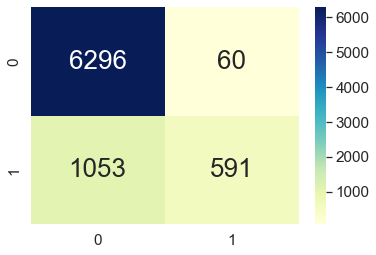

In [132]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_rf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [133]:
from sklearn.metrics import confusion_matrix
x_rf_test=confusion_matrix(y_test,rf_predictions_test)
print(x_rf_test)

[[1585   22]
 [ 266  127]]


Test confusion matrix


<AxesSubplot:>

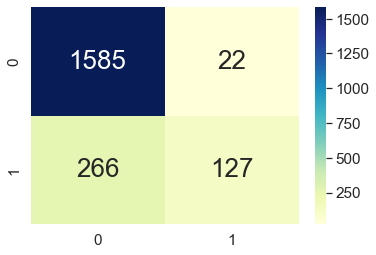

In [134]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_rf_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [135]:
#Precison
#training data
from sklearn.metrics import precision_score
x_rf_p=precision_score(y_train,rf_predictions_train)
print("The precision of  training data",x_rf_p)

The precision of  training data 0.9078341013824884


In [141]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_rf_p_test=precision_score(y_test,rf_predictions_test)
print("The precision for random forest testing data",x_rf_p_test)

The precision for random forest testing data 0.8523489932885906


In [142]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_rf_r_test=recall_score(y_test,rf_predictions_test)
print("The recall of test data for random forest is",x_rf_r_test)


The recall of test data for random forest is 0.3231552162849873


In [143]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_rf_r_train=recall_score(y_train,rf_predictions_train)
print("The recall of training data for Random forest is",x_rf_r_train)


The recall of training data for Random forest is 0.3594890510948905


In [139]:
#accuracy
from sklearn.metrics import accuracy_score
t=accuracy_score(y_train,rf_predictions_train)

print("training accuracy is",t)

from sklearn.metrics import accuracy_score
h=accuracy_score(y_test,rf_predictions_test)

print("testing accuracy is",h)

training accuracy is 0.860875
testing accuracy is 0.856


In [144]:
from prettytable import PrettyTable
columns=(["ALGORITHM", "ACCURACY","F1","PRECISION","RECALL"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","Logistic Regression","SVM", "DECISION TREE" ,"Random Forest"])
myTable.add_column(columns[1], [" 81.64%"," 71.95%","83.0%", "85.95%", "85.60%"])
myTable.add_column(columns[2], ["34.11% ","49.95%","28.87%", "55.78%","46.86%"])
myTable.add_column(columns[3], ["57.92% ","38.64%","81.17%", "73.14%","85.23%"])
myTable.add_column(columns[4], ["24.17% ","71.24%","17.55%", "45.03%","32.31%"])



print(myTable)

+---------------------+----------+---------+-----------+---------+
|      ALGORITHM      | ACCURACY |    F1   | PRECISION |  RECALL |
+---------------------+----------+---------+-----------+---------+
|         KNN         |  81.64%  | 34.11%  |  57.92%   | 24.17%  |
| Logistic Regression |  71.95%  |  49.95% |   38.64%  |  71.24% |
|         SVM         |  83.0%   |  28.87% |   81.17%  |  17.55% |
|    DECISION TREE    |  85.95%  |  55.78% |   73.14%  |  45.03% |
|    Random Forest    |  85.60%  |  46.86% |   85.23%  |  32.31% |
+---------------------+----------+---------+-----------+---------+


# Conclusion of the Project

> we have seen decision tree is giving the best accuracy and f1 score so we can use this algorithm
for the production.